###Importing Necessary Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
import warnings
warnings.filterwarnings('ignore')

###Uploading the Dataset from UCI Library

In [4]:
from google.colab import files
uploaded = files.upload()

Saving sepsis_survival_primary_cohort.csv to sepsis_survival_primary_cohort.csv


In [5]:
df = pd.read_csv('sepsis_survival_primary_cohort.csv')
df.head()

,age_years,sex_0male_1female,episode_number,hospital_outcome_1alive_0dead
0,21,1,1,1
1,20,1,1,1
2,21,1,1,1
3,77,0,1,1
4,72,0,1,1


###Pre-Processing of Dataset

In [6]:
df.shape

(110204, 4)

In [7]:
df.isnull().sum()

age_years                        0
sex_0male_1female                0
episode_number                   0
hospital_outcome_1alive_0dead    0
dtype: int64

In [8]:
#df = pd.DataFrame({'Result': ['one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten', 'eleven', 'twelve', 'thirteen', 'fourteen', 'fifteen', 'sixteen']})
#
## dictionary to map string values to specific values
#mapping = {'draw' : 0, 'one': 1, 'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'seven': 7, 'eight': 8, 'nine': 9, 'ten': 10, 'eleven': 11, 'twelve': 12, 'thirteen': 13, 'fourteen': 14, 'fifteen': 15, 'sixteen': 16}
#
## replace specific string values in 'col1'
#df['Result'] = df['Result'].apply(lambda x: mapping[x] if x in mapping else x)

In [9]:
#cols_to_convert = ['White_King_file', 'White_Rook _file', 'Black_King_file']
#df = df.drop(cols_to_convert,axis=1)

<Axes: xlabel='episode_number', ylabel='count'>

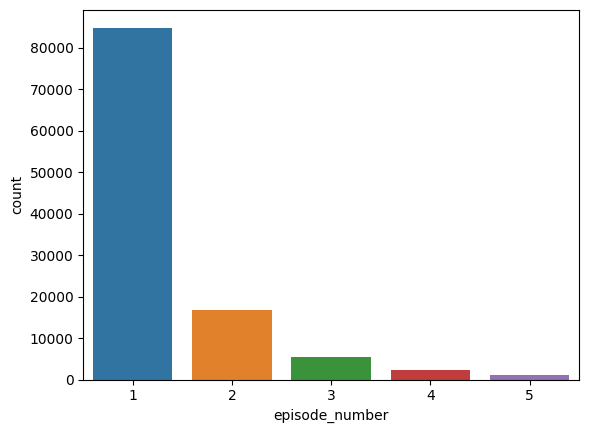

In [25]:
sns.countplot(x ='episode_number', data=df)

In [11]:
#cols_to_convert = ['White_King_file', 'White_Rook _file', 'Black_King_file', 'Result']
#for col in cols_to_convert:
#    df[col] = pd.to_numeric(df[col], errors='coerce').astype(float)

In [12]:
X = df.iloc[:,0:-1]
y = df['hospital_outcome_1alive_0dead']

In [13]:
ss = StandardScaler()
ss.fit_transform(X)

array([[-1.72983711,  1.05353439, -0.4647268 ],
       [-1.77128498,  1.05353439, -0.4647268 ],
       [-1.72983711,  1.05353439, -0.4647268 ],
       ...,
       [ 0.30110817,  1.05353439, -0.4647268 ],
       [-2.60024224, -0.94918591, -0.4647268 ],
       [-2.60024224, -0.94918591, -0.4647268 ]])

###Creation of 10 samples with 70-30 ratio of Training and Testing Set

In [14]:
samples = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    samples.append((X_train, X_test, y_train, y_test))

In [15]:
samples

[(       age_years  sex_0male_1female  episode_number
  5469          71                  1               3
  33723         84                  0               1
  1204          89                  0               1
  39379         87                  0               1
  26008         73                  0               1
  ...          ...                ...             ...
  21243         65                  1               2
  45891         76                  0               2
  42613         75                  0               1
  43567         77                  0               1
  68268         53                  0               1
  
  [77142 rows x 3 columns],
         age_years  sex_0male_1female  episode_number
  43662         76                  1               1
  88487         89                  0               2
  77288         83                  1               1
  56622         53                  1               1
  57189         83                  0              

### Creation of a Fitness Function

In [16]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
result = pd.DataFrame(columns=['Sample', 'Best Accuracy', 'Best Kernel', 'Best Nu', 'Best Epsilon'])

In [17]:
def fitnessFunction(kernel, C, gamma):
  svm = SVC(kernel=kernel, C=C, gamma=gamma, max_iter=1000)
  svm.fit(X_train, y_train)
  y_pred = svm.predict(X_test)
  return accuracy_score(y_pred, y_test)

### Calling the Function for Every Sample

In [18]:
for i in range(len(samples)):
  best_accuracy = 0
  best_C = 0
  best_gamma = 0
  for kernel in kernels:
    X_train, X_test, y_train, y_test = samples[i]
    C = np.random.uniform(0, 10)
    gamma = np.random.uniform(0, 10)
    score = fitnessFunction(kernel, C, gamma)
    if score>best_accuracy:
      best_accuracy = round(score, 2)
      best_C = round(C, 2)
      best_gamma = round(gamma, 2)
      best_kernel = kernel
  print('Best Accuracy = ', best_accuracy, 'Best Kernel = ', best_kernel, 'Best Nu = ', best_C, 'Best Epsilon = ', best_gamma)
  result.loc[i] = [i+1, best_accuracy, best_kernel, best_C, best_gamma]

Best Accuracy =  0.93 Best Kernel =  poly Best Nu =  6.93 Best Epsilon =  2.77
Best Accuracy =  0.56 Best Kernel =  rbf Best Nu =  9.49 Best Epsilon =  9.14
Best Accuracy =  0.92 Best Kernel =  poly Best Nu =  2.45 Best Epsilon =  3.58
Best Accuracy =  0.93 Best Kernel =  linear Best Nu =  2.83 Best Epsilon =  2.95
Best Accuracy =  0.73 Best Kernel =  sigmoid Best Nu =  8.68 Best Epsilon =  3.75
Best Accuracy =  0.58 Best Kernel =  rbf Best Nu =  5.56 Best Epsilon =  6.85
Best Accuracy =  0.93 Best Kernel =  poly Best Nu =  8.94 Best Epsilon =  1.3
Best Accuracy =  0.93 Best Kernel =  poly Best Nu =  1.9 Best Epsilon =  7.19
Best Accuracy =  0.93 Best Kernel =  poly Best Nu =  7.39 Best Epsilon =  9.51
Best Accuracy =  0.93 Best Kernel =  poly Best Nu =  8.62 Best Epsilon =  9.82


###Creation of a Result Table

In [26]:
result

,Sample,Best Accuracy,Best Kernel,Best Nu,Best Epsilon
0,1,0.93,poly,6.93,2.77
1,2,0.56,rbf,9.49,9.14
2,3,0.92,poly,2.45,3.58
3,4,0.93,linear,2.83,2.95
4,5,0.73,sigmoid,8.68,3.75
5,6,0.58,rbf,5.56,6.85
6,7,0.93,poly,8.94,1.30
7,8,0.93,poly,1.90,7.19
8,9,0.93,poly,7.39,9.51
9,10,0.93,poly,8.62,9.82


### Plotting of the Convergence Graph/Linear Curve

In [27]:
X_train, X_test, y_train, y_test = samples[result['Best Accuracy'].idxmax()]

In [28]:
train_sizes, train_scores, test_scores = learning_curve(SVC(kernel=result['Best Kernel'].iloc[result['Best Accuracy'].idxmax()], 
                                                        C=result['Best Nu'].iloc[result['Best Accuracy'].idxmax()],
                                                        gamma=result['Best Epsilon'].iloc[result['Best Accuracy'].idxmax()],
                                                        max_iter = 1000), X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1,
                                                        train_sizes = np.linspace(0.01, 1.0, 50))

In [29]:
train_sizes

array([  694,  2096,  3499,  4902,  6305,  7707,  9110, 10513, 11915,
       13318, 14721, 16124, 17526, 18929, 20332, 21734, 23137, 24540,
       25943, 27345, 28748, 30151, 31553, 32956, 34359, 35761, 37164,
       38567, 39970, 41372, 42775, 44178, 45580, 46983, 48386, 49789,
       51191, 52594, 53997, 55399, 56802, 58205, 59608, 61010, 62413,
       63816, 65218, 66621, 68024, 69427])

In [30]:
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

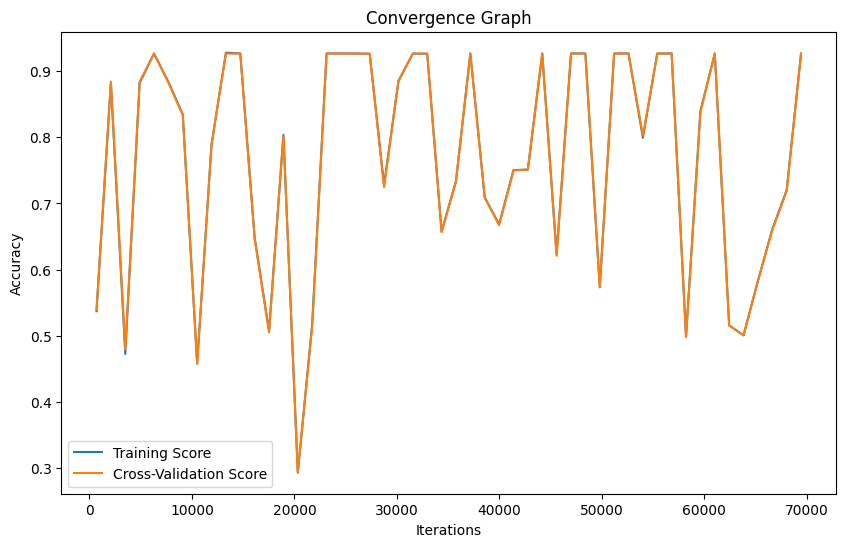

In [35]:
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, test_mean, label='Cross-Validation Score')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Convergence Graph')
plt.legend(loc="best")
plt.show()